# Problem 1

## 1a.
The inverse matrix $M^{-1}$ can be used to calculate the hypothetical state vector $\vec{v}^{-1}$ because the inverse matrix undoes the effect of the original transition matrix $M$. Mathematically, $M^{-1} \cdot \vec{v}^{-1} = \vec{v}_0$, where $\vec{v}_0$ is the initial state vector. Using `np.linalg.inv(M)` gives you the inverse matrix, and multiplying it by the state vector ($\vec{v}_0$) would give $\vec{v}^{-1}$.

```py
import numpy as np

# Assuming M and v0 are defined
M_inv = np.linalg.inv(M)
v_inv = np.dot(M_inv, v0)
```

The problem with this state is that it might not be a valid state for the political system. The values in $\vec{v}^{-1}$ might not represent valid proportions of voters for each party, such as negative values or values greater than 1.


- For **1b** the constructor is modified to raise an error if the dimensions of the initial state vector *$\vec{v}_0$* do not match the number of rows/columns in the transition matrix *M*.
- For **1d** *$\vec{v}_0$* can be calculated via *$M^{10} \cdot \vec{v}_0$* because raising the transition matrix *M* to the power of 10 represents the system's state after 10 timesteps.

In [1]:
# 1 b, c, d, e.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Markov():
    def __init__(self, v0, M, colors = []):
        if len(v0) != len(M) or any(len(row) != len(M) for row in M):
            raise ValueError("Invalid dimensions for v0 or M")
        self.__i = 0
        self.__v = [v0]
        self.__M = M
        self.colors = colors
               
    def __str__(self):
        return "Timestep: {}\nState: {}".format(self.__i, self.__v[-1])
    
    def evolve(self):
        self.__v.append( np.dot(self.__M, self.__v[-1]) )
        self.__i += 1
    
    def total_voters_over_time(self):
        return [np.sum(voters) for voters in self.__v]
    
    def batchEvolve(self, n):
        for _ in range(n):
            self.evolve()
    
    def plot_voters_over_time(self):
        df = pd.DataFrame(self.__v, columns=self.colors)
        for column, color in zip(df.columns, self.colors):
            plt.plot(df.index, df[column], label=column, color=color)

        plt.xlabel('Time Step')
        plt.ylabel('Number of Voters')
        plt.legend()
        plt.show()
    

Plotting the number of voters over time ...

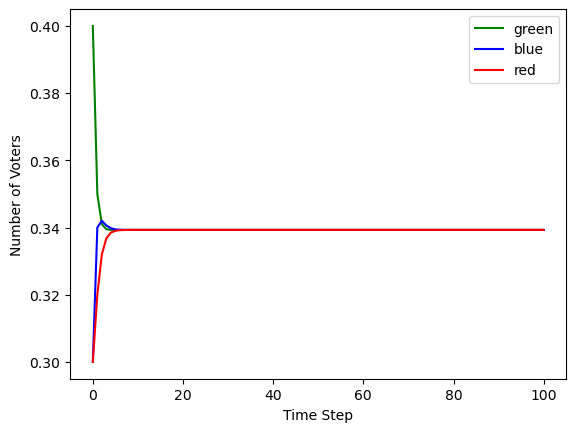

In [2]:
# 1e. continued
my_v0 = [0.4, 0.3, 0.3] 
my_M = [
    [0.5, 0.3, 0.2],
    [0.4, 0.5, 0.1],
    [0.2, 0.3, 0.5]
] 

neurostan = Markov(my_v0, my_M, ["green", "blue", "red"])
neurostan.batchEvolve(100)
neurostan.plot_voters_over_time()

f) The eigenvector $v_{λ=1}$ associated with the eigenvalue `λ = 1` represents a special case where the matrix `M`, when applied to the eigenvector, only scales the vector by a factor of 1 and does not change its direction. In the context of dynamic systems or Markov chains, this can represent a steady state or equilibrium.

In [3]:
# f. continued
eigenvalues, eigenvectors = np.linalg.eig(my_M)
index_lambda_1 = np.where(np.isclose(eigenvalues, 1))[0][0]
v_lambda_1 = eigenvectors[:, index_lambda_1]

print(v_lambda_1)

[-0.57735027 -0.57735027 -0.57735027]


# Problem 2
## Fraction Class Overview

In this code snippet, we've crafted a simple yet powerful `frac` class to handle fractions. Fractions consist of a numerator (`p`) and a denominator (`q`). The class ensures proper initialization, guards against division by zero, and supports fraction addition. The key highlight is the automatic simplification of fractions using the greatest common divisor.

In [4]:
# 2
class frac:
    def __init__(self, p, q):  # a.
        if q == 0:
            raise ValueError("Denominator cannot be zero!")
        self.p = p
        self.q = q
        self.short()
        
    def __str__(self):   # b.
        return f"{self.p}/{self.q}"
    
    def __add__(self, b):    # c.
        new_numerator = self.p * b.q + b.p * self.q
        new_denominator = self.p * b.q
        summ = frac(new_numerator, new_denominator)
        summ.short()
        return summ
        
    def short(self):   # d.
        common_divisor = self.greComDiv(self.p, self.q)
        if common_divisor != 0:
            self.p //= common_divisor
            self.q //= common_divisor
        
    @staticmethod
    def greComDiv(p, q):    # d.
        if p == 0:
            return abs(p)
        if q == 0:
            return abs(q)
        while q != 0:
            h = p % q
            p = q
            q = h
        return abs(p)
        

Using the ```frac``` class ...

In [5]:
frac1 = frac(3, 4)
frac2 = frac(1, 2)

print(f"Fraction 1: {frac1}")
print(f"Fraction 2: {frac2}")

sum_frac = frac1 + frac2
print(f"Sum of fractions: {sum_frac}")

Fraction 1: 3/4
Fraction 2: 1/2
Sum of fractions: 5/3
